# C.7.1 데이터 추가 처리

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('2014DC1_log_u.csv')
df.shape

(12417, 75)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12417 entries, 0 to 12416
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Asset2              12417 non-null  float64
 1   Asset7              10889 non-null  float64
 2   Asset9              8896 non-null   float64
 3   B2B_purchase1       9170 non-null   float64
 4   Capital1            12417 non-null  float64
 5   CapitalRatio1       12417 non-null  float64
 6   Cost1               12417 non-null  float64
 7   Cost11              12415 non-null  float64
 8   Cost12              12412 non-null  float64
 9   Cost13              12409 non-null  float64
 10  Cost14              12417 non-null  float64
 11  Cost16              12167 non-null  float64
 12  Cost17              12407 non-null  float64
 13  Cost2               12417 non-null  float64
 14  Cost9               12417 non-null  float64
 15  Design1             11920 non-null  float64
 16  Emp_

In [2]:
df.dtypes

Asset2                float64
Asset7                float64
Asset9                float64
B2B_purchase1         float64
Capital1              float64
CapitalRatio1         float64
Cost1                 float64
Cost11                float64
Cost12                float64
Cost13                float64
Cost14                float64
Cost16                float64
Cost17                float64
Cost2                 float64
Cost9                 float64
Design1               float64
Emp_total             float64
EquityShareCapital    float64
ITAssetC              float64
Liability2            float64
Liability3            float64
NProfitB4Tax          float64
OutsourcingCost       float64
Patent1               float64
RNDcost1              float64
RevProfit2            float64
TAssetC1              float64
TAssetC2              float64
TAssetC3              float64
TAssetC4              float64
TAssetC5              float64
TAssetC6              float64
TAssetC8              float64
TradeMark1

In [3]:
df['IndCategory1'].value_counts(dropna=False)

C    5949
G    1400
J    1072
H     684
M     621
0     586
F     551
I     317
K     276
L     274
R     263
E     129
S      94
P      93
D      55
A      24
Q      17
B      12
Name: IndCategory1, dtype: int64

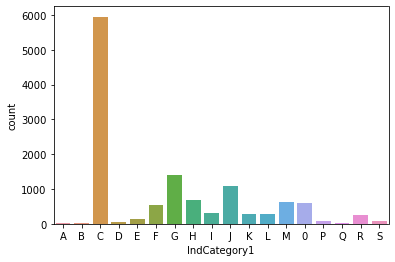

In [4]:
import seaborn as sns
sns.countplot(x='IndCategory1', data=df);

In [6]:
from sklearn.preprocessing import OrdinalEncoder   # OrdinalEncoder를 import
df['IndCategory1_encoded'] = OrdinalEncoder().fit_transform(df['IndCategory1'].values.reshape(-1,1))
df.groupby(['IndCategory1', 'IndCategory1_encoded']).size()   # 변경전후 변수값 비교표 디스플레이

IndCategory1  IndCategory1_encoded
0             0.0                      586
A             1.0                       24
B             2.0                       12
C             3.0                     5949
D             4.0                       55
E             5.0                      129
F             6.0                      551
G             7.0                     1400
H             8.0                      684
I             9.0                      317
J             10.0                    1072
K             11.0                     276
L             12.0                     274
M             13.0                     621
P             14.0                      93
Q             15.0                      17
R             16.0                     263
S             17.0                      94
dtype: int64

In [7]:
df['IndCategory1_encoded'].dtypes

dtype('float64')

In [8]:
df.drop(['IndCategory1'], axis=1, inplace=True)   # IndCategory1 변수 제거

In [9]:
df.shape

(12417, 75)

In [10]:
df.isna().any()[lambda x: x]   # null value를 갖고 있는 변수명(컬럼명) 찾기

Asset7             True
Asset9             True
B2B_purchase1      True
Cost11             True
Cost12             True
Cost13             True
Cost16             True
Cost17             True
Design1            True
ITAssetC           True
Liability3         True
OutsourcingCost    True
Patent1            True
RNDcost1           True
TAssetC1           True
TAssetC2           True
TAssetC3           True
TAssetC4           True
TAssetC5           True
TAssetC6           True
TAssetC8           True
TradeMark1         True
emp66              True
Overseas5          True
dtype: bool

In [11]:
df['Overseas5'].value_counts(dropna=False)

1.0    8765
NaN    3652
Name: Overseas5, dtype: int64

In [12]:
df['Overseas5'] = df['Overseas5'].fillna(0).astype(np.int64) # Overseas5 null value를 0으로 대체
df['Overseas5'].value_counts(dropna=False)

1    8765
0    3652
Name: Overseas5, dtype: int64

In [13]:
# 참조 코딩
df['Overseas5'].dtypes

dtype('int64')

In [14]:
df.to_csv('2014DC2.csv', index=False)

# C.7.2 데이터 분할 및 대체

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2.csv')

In [31]:
# 참조 코딩
df.dtypes

Asset2                  float64
Asset7                  float64
Asset9                  float64
B2B_purchase1           float64
Capital1                float64
CapitalRatio1           float64
Cost1                   float64
Cost11                  float64
Cost12                  float64
Cost13                  float64
Cost14                  float64
Cost16                  float64
Cost17                  float64
Cost2                   float64
Cost9                   float64
Design1                 float64
Emp_total               float64
EquityShareCapital      float64
ITAssetC                float64
Liability2              float64
Liability3              float64
NProfitB4Tax            float64
OutsourcingCost         float64
Patent1                 float64
RNDcost1                float64
RevProfit2              float64
TAssetC1                float64
TAssetC2                float64
TAssetC3                float64
TAssetC4                float64
TAssetC5                float64
TAssetC6

In [2]:
# 참조 코딩
# dtype을 category로 지정해 줄 변수들을 cols1에 임시 저장
cols1 = ['Area', 'Compensation1', 'Compensation2', 'Compensation3', 'Compensation4', 'EBizSystem2','EBizSystem3',\
        'EBizSystem4','EBizSystem5','EBizSystem6','EBizSystem7','EBizSystem8','EBizSystem9','EBizSystem10',\
        'EBizSystem11','EBizSystem12','Franchise1','IndCategory2','NewEntry3',\
        'Outsourcing1', 'Outsourcing2', 'Outsourcing3', 'Outsourcing4', 'Outsourcing5', 'Outsourcing6',\
        'Outsourcing7','Outsourcing8', 'Outsourcing9', 'Outsourcing10', 'Outsourcing11', 'Outsourcing12',\
        'Outsourcing13','Overseas1','Overseas5','ParentCompany1','SAlliance1','StockMktListing','Subsidiary1',\
        'IndCategory1_encoded']

df[cols1] = df[cols1].astype('category')   # cols1에 저장된 변수들의 dtype을 category로 변경.

In [58]:
# 참조 코딩
df.dtypes

Asset2                   float64
Asset7                   float64
Asset9                   float64
B2B_purchase1            float64
Capital1                 float64
CapitalRatio1            float64
Cost1                    float64
Cost11                   float64
Cost12                   float64
Cost13                   float64
Cost14                   float64
Cost16                   float64
Cost17                   float64
Cost2                    float64
Cost9                    float64
Design1                  float64
Emp_total                float64
EquityShareCapital       float64
ITAssetC                 float64
Liability2               float64
Liability3               float64
NProfitB4Tax             float64
OutsourcingCost          float64
Patent1                  float64
RNDcost1                 float64
RevProfit2               float64
TAssetC1                 float64
TAssetC2                 float64
TAssetC3                 float64
TAssetC4                 float64
TAssetC5  

In [3]:
data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['EBizSystem2']                # 타겟변수만 target에 저장

In [17]:
data.shape

(12417, 74)

In [18]:
target.shape

(12417,)

In [4]:
# 50:50 data partition
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

In [5]:
# interval 변수의 null value를 평균(mean)으로 impute 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 74)
X_test2 shape: (6209, 74)


# C.7.3 Decision Tree 모델

In [6]:
# 50:50 Data partition
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.3임에 주의

# interval 변수의 null value를 평균(mean)으로 impute 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train2, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료를 투입해서 타겟변수 예측값 생성
 
print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.61765


In [7]:
df['EBizSystem2'].value_counts(normalize=True, dropna=False) # normalize 옵션으로 결과가 비율로 생성

1    0.571636
0    0.428364
Name: EBizSystem2, dtype: float64

In [23]:
# Decision Tree 모형 Gini 기준(Default 설정)에서 Best Model
# Decision Tree depth=5.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0, max_depth=5)   # Tree 최대 depth를 5로 설정 
model = tree.fit(X_train2, y_train)

print("Accuracy(by GINI) on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print("Accuracy(by GINI) on test set:{:.5f}".format(model.score(X_test2, y_test)))

Accuracy(by GINI) on training set:0.72052
Accuracy(by GINI) on test set:0.68836


In [24]:
# Decision Tree 모형 Entropy 기준에서 Best Model
# DecisionTree depth=5
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5)
model = tree.fit(X_train2, y_train)

print("Accuracy(by Entrophy) on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print("Accuracy(by Entrophy) on test set:{:.5f}".format(model.score(X_test2, y_test)))

Accuracy(by Entrophy) on training set:0.71585
Accuracy(by Entrophy) on test set:0.69077


In [8]:
# Decision Tree 모델 (Entropy 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5) 

In [27]:
# 참조 코딩
print(clf_e.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [28]:
# 참조 코딩
# range() 함수의 결과를 디스플레이.
for i in range(2,11):
    print(i, end =" ")
print()

2 3 4 5 6 7 8 9 10 


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'criterion':['gini','entropy'],'max_depth': range(2,11)}

grid_e = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=cross_validation,\
                      n_jobs=-1)
grid_e.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_e.best_score_))
print("GridSearchCV best parameter:", (grid_e.best_params_))  

GridSearchCV max accuracy:0.68782
GridSearchCV best parameter: {'criterion': 'gini', 'max_depth': 4}


In [10]:
best_clf = grid_e.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.68626


In [11]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.73638


In [12]:
print ("Feature importances:") 
print (best_clf.feature_importances_) 

Feature importances:
[0.11344143 0.         0.         0.         0.         0.02238919
 0.50315746 0.         0.         0.         0.         0.
 0.         0.11323061 0.         0.         0.         0.03716007
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0155     0.         0.         0.
 0.         0.         0.         0.06427623 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01769543 0.         0.         0.         0.07032241 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04282718]


In [13]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리 

,Feature_importances
Cost1,0.503
Asset2,0.113
Cost2,0.113
IndCategory2,0.070
TradeMark1,0.064
...,...
emp66,0.000
Area,0.000
Asset7,0.000
Compensation2,0.000


In [34]:
# 참조 코딩
# 데이터프레임의 행과 열 전체를 보이게 하는 조치를 (필요시) 추가
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

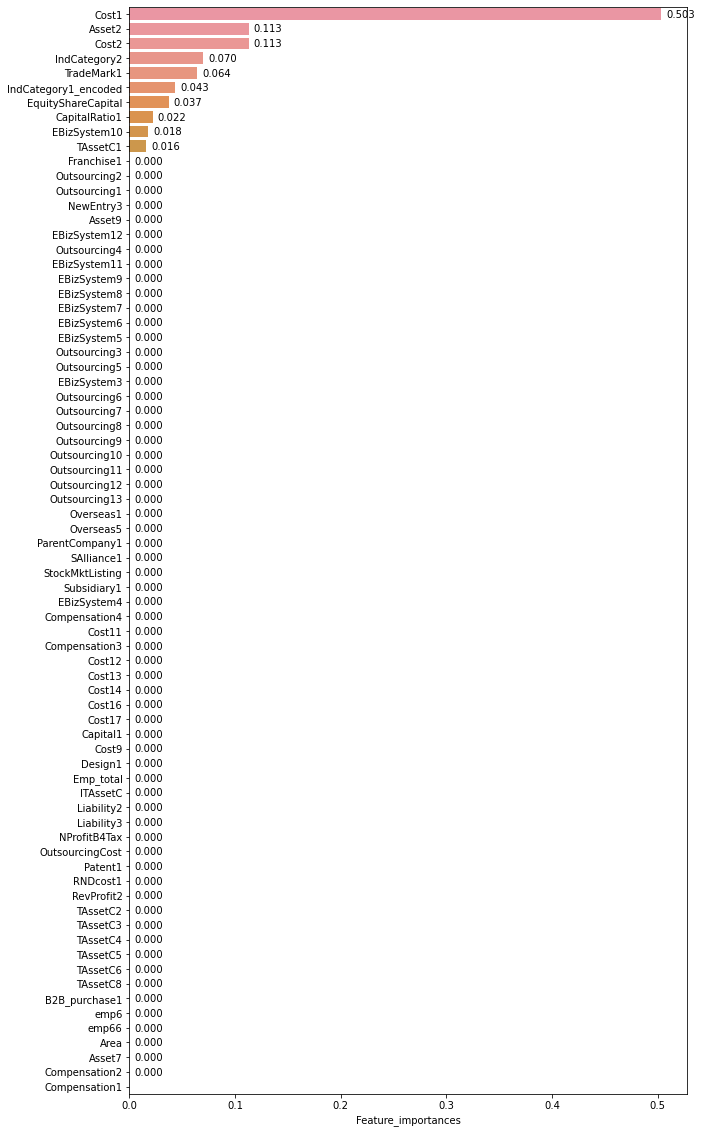

In [17]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),\
                xytext=(5, 10), textcoords='offset points')

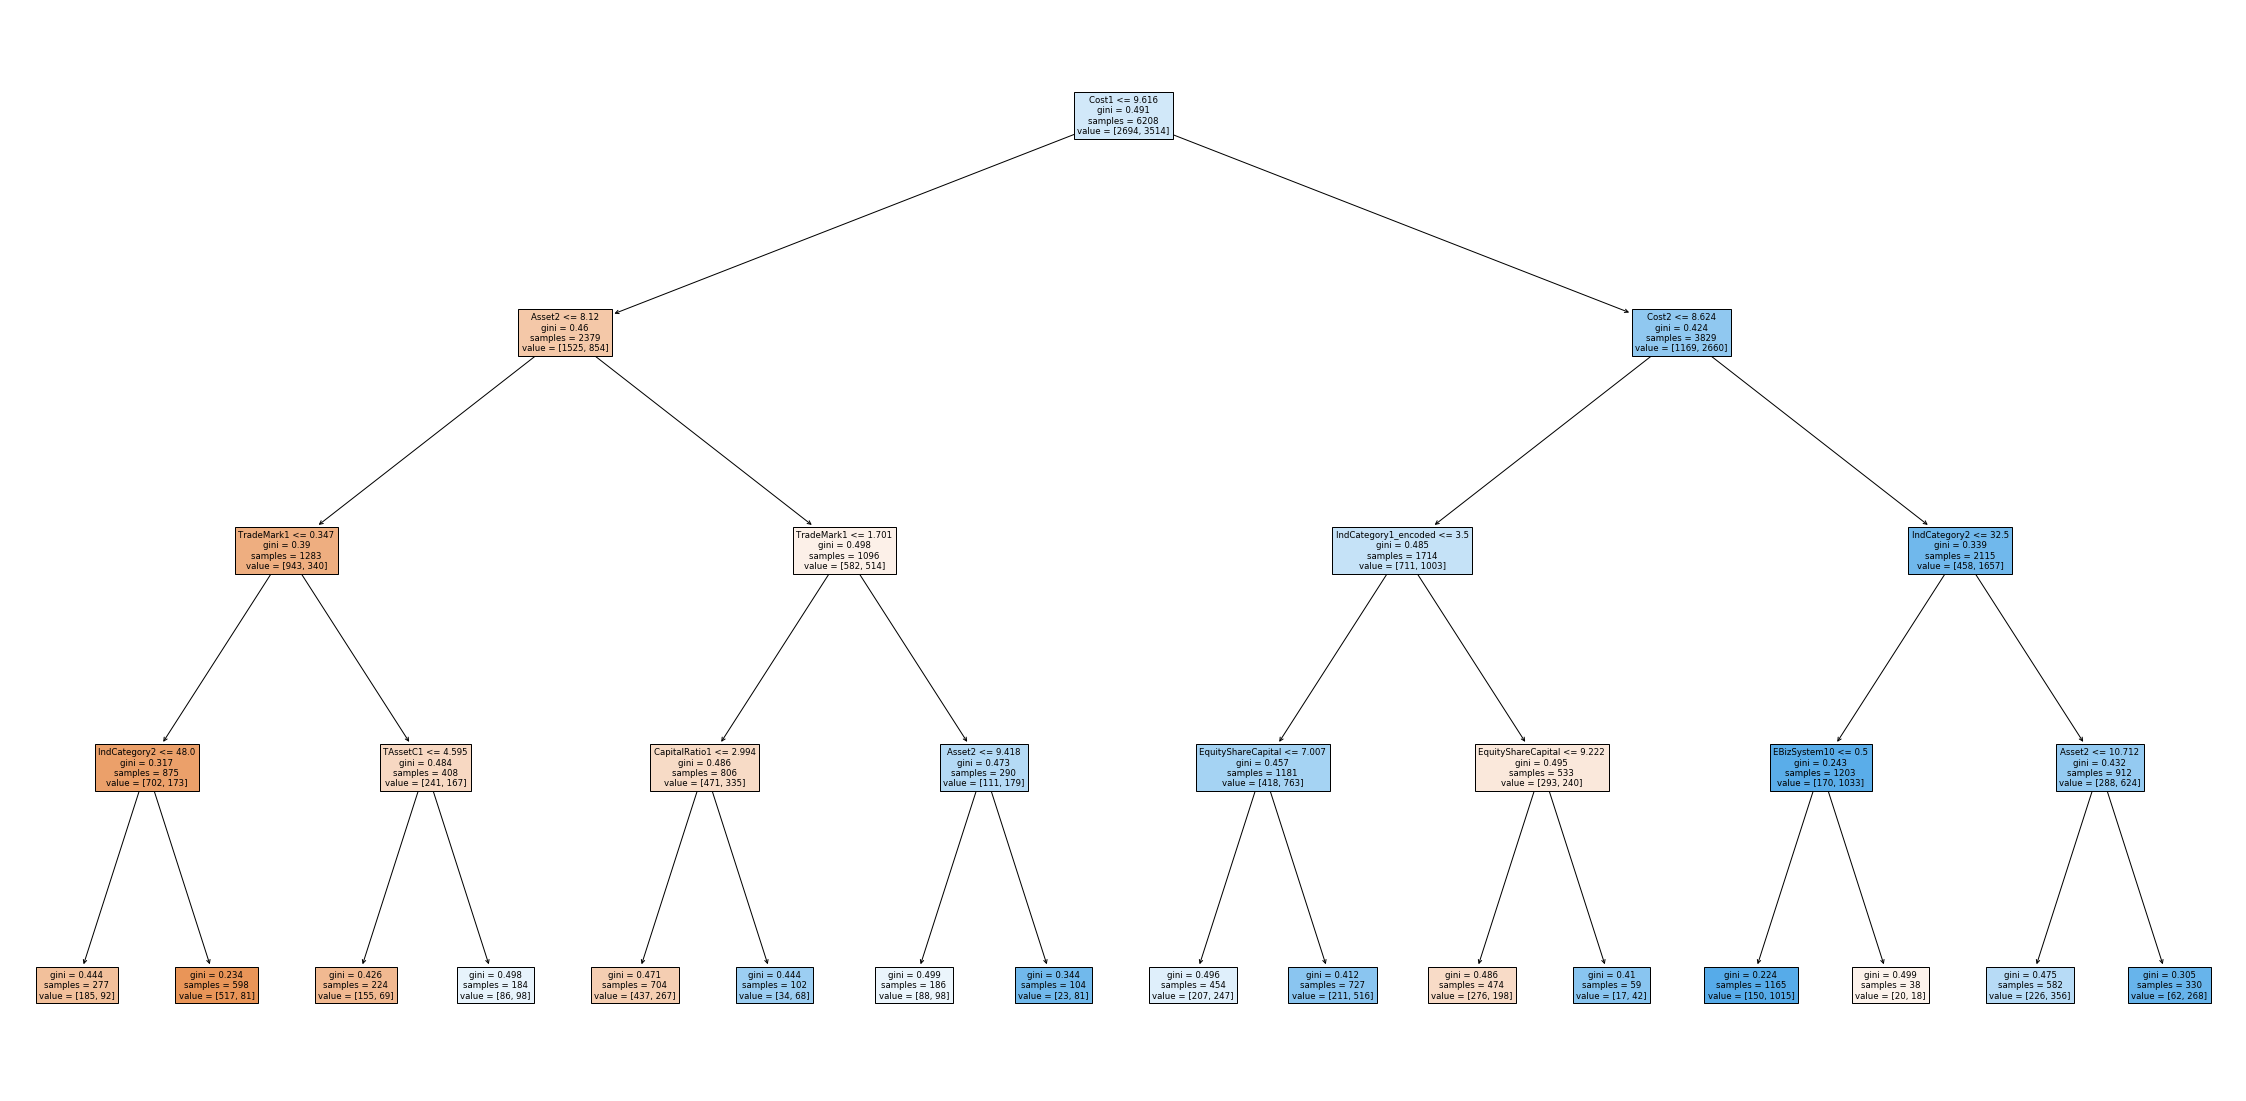

In [37]:
# 참조 코딩
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(40, 20))
_ = tree.plot_tree(best_clf,
                   feature_names=list(data.columns),  
                   filled=True)

In [133]:
# graphviz는 독자 여러분의 PC 설정에 따라 주피터 노트북에 제대로 설치되지 않는 경우가 있습니다.
# 이런 경우는 graphviz를 구글 코랩에서 설치하시는 것을 추천드립니다.

# 단 구글 코랩에서 이 노트북 파일을 실행할 경우 데이터 파일을 구글 클라우드에 올리고, 
# 데이터 파일을 불러오는 과정은 책 2.6.2절과 4.7.6절을 참고하여 적용하시기 바랍니다.   

#pip install graphviz 
!pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
import graphviz

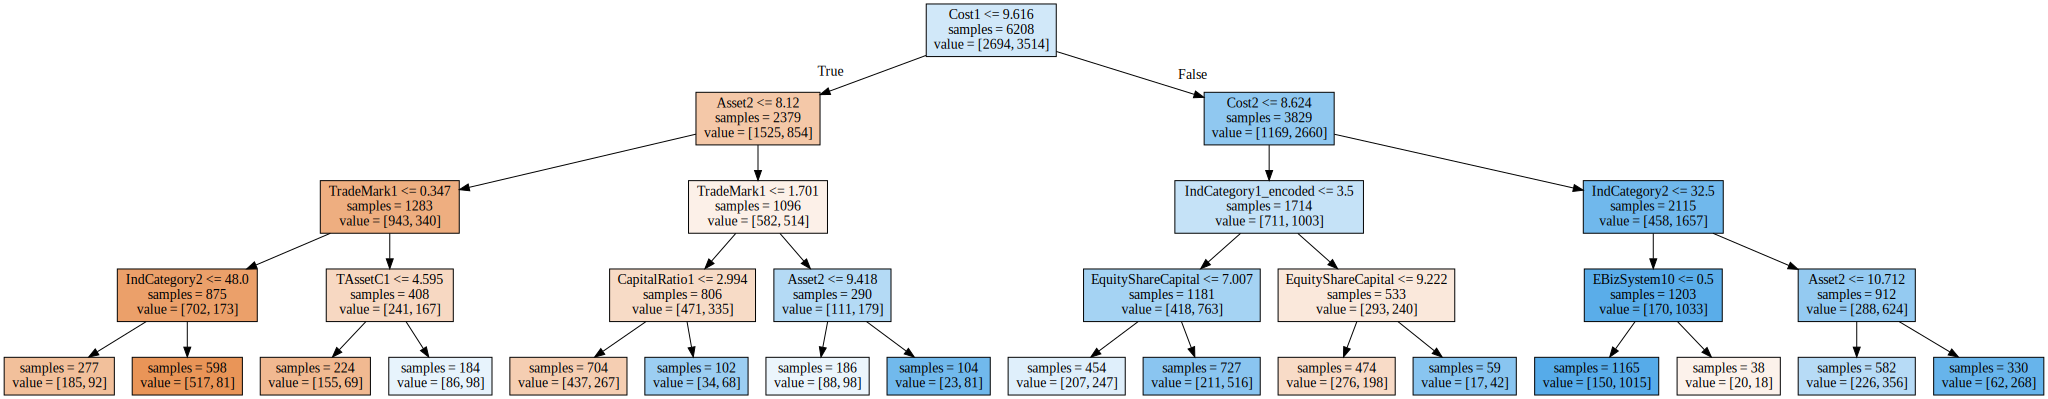

In [14]:
# model의 결과물을 tree.dot에 저장      
from sklearn.tree import export_graphviz 
export_graphviz(best_clf, out_file = "tree.dot",   
                feature_names = list(data.columns), impurity = False , filled = True )

# tree.dot을 graphviz 기능을 통해 디스플레이
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read() 
display(graphviz.Source(dot_graph)) 

In [44]:
# 참조: 처음 graphviz를 실행했을 때의 결과 화면
# pip install graphviz
# !pip install graphviz

Note: you may need to restart the kernel to use updated packages.
